## Small project

This small project aims to compare the real-life behavior of sorting algorithms with theoretical expectations. This requires measurements: real-life, physical experiments on computer code and data of repeated tests run on sorted data. In your paper, you shall implement and benchmark the following sorting algorithms, using the algorithms presented in pseudocode in the course:

* Insertion sort
* Merge sort
* Quicksort

In your benchmarks, you shall use test data suitable to test the the behavior of the algorithms under the worst-case, best case and average-case scenarios. In order to study the scaling behavior of algorithms with problem size, one usually increases problem size 𝑛 by a factor, e.g., 2, 10 or 16 instead of increasing the problem size linearly.
You can limit your largest problem size so that the full set of all benchmarks do not execute long on your computer. Drop test cases that take a too long time (e.g., large sizes for quadratic algorithms)

In [1]:
# imports
import random
import time
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import sys

### Insertion sort

In [2]:
def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]  
            i = i - 1
        A[i + 1] = key  

### Merge sort

In [3]:
# This function sorts an array using the merge sort algorithm
def merge_sort(A, p, r):
    if p < r:
        q = (p + r) // 2        # Splits the array into two approximately equal halves
        merge_sort(A, p, q)     # Recursively sorts the left half
        merge_sort(A, q + 1, r) # Recursively sorts the right half
        merge(A, p, q, r)       # Merges the two sorted halves


# This function merges the two sorted arrays
# A is the array and p, q, r are indices where p <= q < r
def merge(A, p, q, r):
    
    # Initialises the variables to represent the two halves
    n1 = q - p + 1     
    n2 = r - q          
    
    left = [0] * (n1)    
    right = [0] * (n2)  

    # Copies the two halves into the left and right arrays
    for i in range(0, n1):
        left[i] = A[p + i]

    for j in range(0, n2):
        right[j] = A[q + 1 + j]
    
    i = j = 0
    k = p

    # Merges the two halves into the original array
    while i < n1 and j < n2:
        if left[i] <= right[j]:
            A[k] = left[i]
            i += 1
        else:
            A[k] = right[j]
            j += 1
        k += 1
    
    while i < n1:
        A[k] = left[i]
        i += 1
        k += 1

    while j < n2:
        A[k] = right[j]
        j += 1
        k += 1

### Quick sort

In [4]:
def quicksort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quicksort(A, p, q - 1)
        quicksort(A, q + 1, r)

def partition(A, p, r):
    x = A[p]  # Pivot is the first element
    i = p     #
    
    for j in range(p + 1, r + 1):
        if A[j] <= x:
            i = i + 1
            A[i], A[j] = A[j], A[i]  
    
    A[p], A[i] = A[i], A[p]  
    return i

### Benchmarking

In [5]:
sys.setrecursionlimit(70000)

def sorted_list(n):
    return list(range(n))

def reverse_sorted_list(n):
    return list(range(n, 0, -1))

def random_sorted_list(n):
    lst = list(range(n))
    random.shuffle(lst)
    return lst

# Function to measure the time of a sorting algorithm
def measure_sort_time(func, data):
    start_time = time.time()
    if func == insertion_sort:
        func(data)
    elif func == merge_sort:
        func(data, 0, len(data) - 1)
    elif func == quicksort:
        func(data, 0, len(data) - 1)
    else: 
        ValueError("Invalid function")
    return time.time() - start_time

# The test data sizes
sizes = [2**2, 2**4, 2**6, 2**8, 2**10, 2**12, 2**14]

# Empty dictionaries to store the times
sorted_times = {"Insertion sort": [], "Merge sort": [], "Quicksort": []}
reverse_times = {"Insertion sort": [], "Merge sort": [], "Quicksort": []}
random_times = {"Insertion sort": [], "Merge sort": [], "Quicksort": []}

insertion_table = PrettyTable()
insertion_table.field_names = ["Size", "Sorted (sec)", "Reverse sorted (sec)", "Randomly sorted (sec)"]

merge_table = PrettyTable()
merge_table.field_names = ["Size", "Sorted (sec)", "Reverse sorted (sec)", "Randomly sorted (sec)"]

quicksort_table = PrettyTable()
quicksort_table.field_names = ["Size", "Sorted (sec)", "Reverse sorted (sec)", "Randomly sorted (sec)"]

for size in sizes:
    # Insertion sort
    data_best = sorted_list(size)
    time_best = measure_sort_time(insertion_sort, data_best[:])
    sorted_times["Insertion sort"].append(time_best)
    
    data_worst = reverse_sorted_list(size)
    time_worst = measure_sort_time(insertion_sort, data_worst[:])
    reverse_times["Insertion sort"].append(time_worst)
    
    data_average = random_sorted_list(size)
    time_average = measure_sort_time(insertion_sort, data_average[:])
    random_times["Insertion sort"].append(time_average)
    
    insertion_table.add_row([size, f"{time_best:.8f}", f"{time_worst:.8f}", f"{time_average:.8f}"])


    # Merge sort
    sorted = sorted_list(size)
    time_sorted = measure_sort_time(merge_sort, sorted[:])
    sorted_times["Merge sort"].append(time_sorted)
    
    reversed = reverse_sorted_list(size)
    time_reversed = measure_sort_time(merge_sort, reversed[:])
    reverse_times["Merge sort"].append(time_reversed)
    
    random_merge = random_sorted_list(size)
    time_random = measure_sort_time(merge_sort, random_merge[:])
    random_times["Merge sort"].append(time_random)    

    merge_table.add_row([size, f"{time_sorted:.8f}", f"{time_reversed:.8f}", f"{time_random:.8f}"])


    # Quicksort
    quick_sorted = sorted_list(size)
    time_quick_sorted = measure_sort_time(quicksort, quick_sorted[:])
    sorted_times["Quicksort"].append(time_quick_sorted)

    quick_reversed = reverse_sorted_list(size)
    time_quick_reversed = measure_sort_time(quicksort, quick_reversed[:])
    reverse_times["Quicksort"].append(time_quick_reversed)

    quick_random = random_sorted_list(size)
    time_quick_random = measure_sort_time(quicksort, quick_random[:])
    random_times["Quicksort"].append(time_quick_random)

    quicksort_table.add_row([size, f"{time_quick_sorted:.8f}", f"{time_quick_reversed:.8f}", f"{time_quick_random:.8f}"])

print("Insertion sort:\n", insertion_table)
print("Merge sort:\n", merge_table)
print("Quicksort:\n", quicksort_table)


Insertion sort:
 +-------+--------------+----------------------+-----------------------+
|  Size | Sorted (sec) | Reverse sorted (sec) | Randomly sorted (sec) |
+-------+--------------+----------------------+-----------------------+
|   4   |  0.00000215  |      0.00000191      |       0.00000095      |
|   16  |  0.00000072  |      0.00001216      |       0.00000596      |
|   64  |  0.00000596  |      0.00015306      |       0.00006914      |
|  256  |  0.00001931  |      0.00224209      |       0.00117111      |
|  1024 |  0.00009012  |      0.03966212      |       0.01990414      |
|  4096 |  0.00038290  |      0.63131785      |       0.32203126      |
| 16384 |  0.00151086  |     10.09475994      |       5.05278897      |
+-------+--------------+----------------------+-----------------------+
Merge sort:
 +-------+--------------+----------------------+-----------------------+
|  Size | Sorted (sec) | Reverse sorted (sec) | Randomly sorted (sec) |
+-------+--------------+----------

### Vizualization

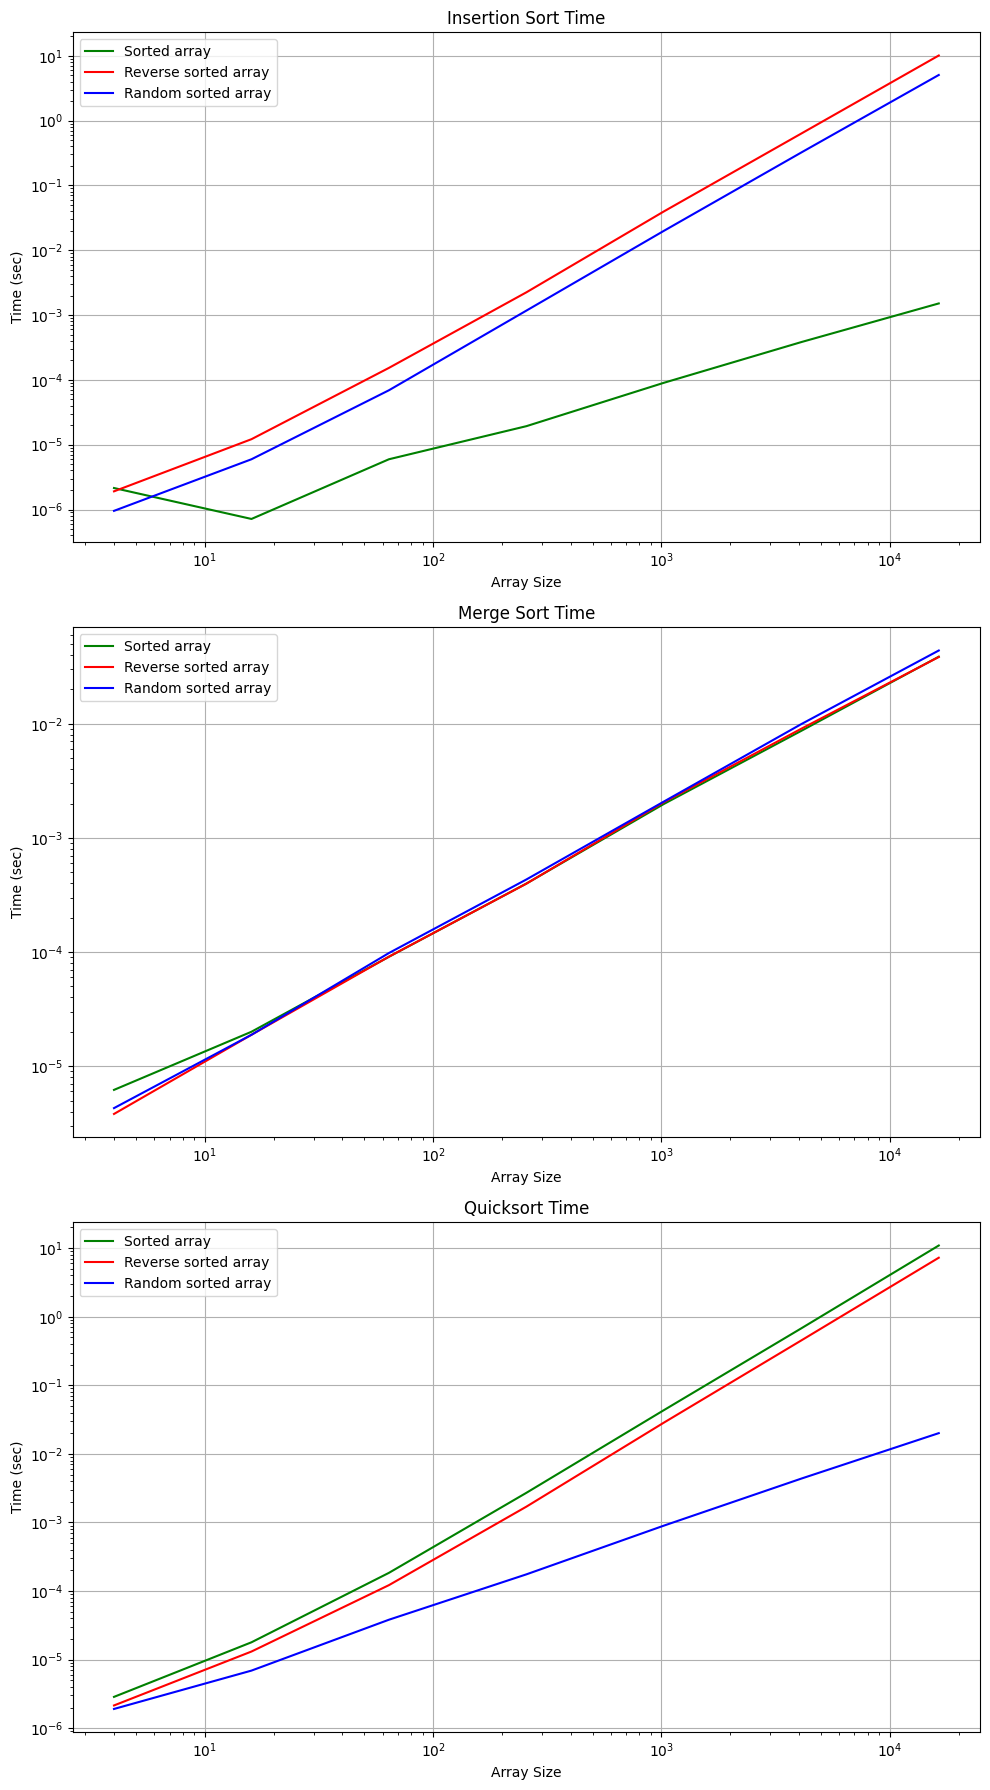

In [6]:
plt.figure(figsize=(10, 18))
plt.subplot(3, 1, 1)
plt.plot(sizes, sorted_times["Insertion sort"], 'g-', label='Sorted array')
plt.plot(sizes, reverse_times["Insertion sort"], 'r-', label='Reverse sorted array')
plt.plot(sizes, random_times["Insertion sort"], 'b-', label='Random sorted array')
plt.xlabel('Array Size')
plt.ylabel('Time (sec)')
plt.title('Insertion Sort Time')
plt.legend()
plt.grid(True)
plt.xscale('log') 
plt.yscale('log')

plt.subplot(3, 1, 2)
plt.plot(sizes, sorted_times["Merge sort"], 'g-', label='Sorted array')
plt.plot(sizes, reverse_times["Merge sort"], 'r-', label='Reverse sorted array')
plt.plot(sizes, random_times["Merge sort"], 'b-', label='Random sorted array')
plt.xlabel('Array Size')
plt.ylabel('Time (sec)')
plt.title('Merge Sort Time')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.subplot(3, 1, 3)
plt.plot(sizes, sorted_times["Quicksort"], 'g-', label='Sorted array')
plt.plot(sizes, reverse_times["Quicksort"], 'r-', label='Reverse sorted array')
plt.plot(sizes, random_times["Quicksort"], 'b-', label='Random sorted array')
plt.xlabel('Array Size')
plt.ylabel('Time (sec)')
plt.title('Quicksort Time')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()